# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from scipy.stats import linregress

# Import API key

from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
#For reference
dataset_df = pd.read_csv('output_data/cities.csv')
dataset_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
#TESTING 

#cities = ["Paris", "London", "Oslo", "Beijing"]

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#list 
# 9

time.sleep(1)


lat = []

lng = []

temp = []

cloudiness = []

date = []

country = []

humiditie = []

wind_speed =[]

citiesss = []


#counter
count_record = 0
set_num = 1


# Loop through the list of cities and perform a request for data on each
for city in cities:
    
     try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        lng.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all']) 
        date.append(response ['dt'])   
        country.append(response['sys']['country'])
        humiditie.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
#cities    
                         
                         
        if count_record > 50:
                                                                                      
             count_record = 0
             set_num = set_num +1
             citiesss.append(city)
                     
        else:
             count_record +=1
             citiesss.append(city)
             print(f"Data Retrieval record {count_record} , {set_num} , {city} ")

                          
                    
     except:
    
         count_record = count_record +1
         citiesss.append(city)
         print(f"City not found here {city}")


Data Retrieval record 1 , 1 , saint-louis 
Data Retrieval record 2 , 1 , bilibino 
Data Retrieval record 3 , 1 , nikolskoye 
Data Retrieval record 4 , 1 , vaini 
Data Retrieval record 5 , 1 , kodiak 
Data Retrieval record 6 , 1 , east london 
Data Retrieval record 7 , 1 , pangnirtung 
Data Retrieval record 8 , 1 , thompson 
Data Retrieval record 9 , 1 , taltal 
Data Retrieval record 10 , 1 , sao joao da barra 
Data Retrieval record 11 , 1 , punta arenas 
Data Retrieval record 12 , 1 , hobart 
Data Retrieval record 13 , 1 , progreso 
Data Retrieval record 14 , 1 , westport 
Data Retrieval record 15 , 1 , galle 
Data Retrieval record 16 , 1 , port elizabeth 
Data Retrieval record 17 , 1 , humaita 
Data Retrieval record 18 , 1 , frederico westphalen 
Data Retrieval record 19 , 1 , amarante do maranhao 
Data Retrieval record 20 , 1 , vulcan 
Data Retrieval record 21 , 1 , millinocket 
Data Retrieval record 22 , 1 , new norfolk 
Data Retrieval record 23 , 1 , bluff 
Data Retrieval record 24

Data Retrieval record 51 , 4 , yulara 
City not found here bolungarvik
Data Retrieval record 2 , 5 , naujamiestis 
Data Retrieval record 3 , 5 , gua musang 
Data Retrieval record 4 , 5 , erzin 
Data Retrieval record 5 , 5 , alice springs 
Data Retrieval record 6 , 5 , udachnyy 
Data Retrieval record 7 , 5 , alofi 
Data Retrieval record 8 , 5 , jiuquan 
Data Retrieval record 9 , 5 , tasiilaq 
Data Retrieval record 10 , 5 , sioux lookout 
Data Retrieval record 11 , 5 , sabang 
Data Retrieval record 12 , 5 , kapoeta 
Data Retrieval record 13 , 5 , portland 
Data Retrieval record 14 , 5 , sovetskaya 
Data Retrieval record 15 , 5 , geraldton 
Data Retrieval record 16 , 5 , aleksandrov gay 
Data Retrieval record 17 , 5 , puerto del rosario 
Data Retrieval record 18 , 5 , krasnovishersk 
Data Retrieval record 19 , 5 , taksimo 
Data Retrieval record 20 , 5 , cockburn town 
Data Retrieval record 21 , 5 , harper 
Data Retrieval record 22 , 5 , sarangani 
Data Retrieval record 23 , 5 , khuzdar 
D

Data Retrieval record 1 , 9 , conceicao da barra 
Data Retrieval record 2 , 9 , kupang 
Data Retrieval record 3 , 9 , bilma 
Data Retrieval record 4 , 9 , mpulungu 
Data Retrieval record 5 , 9 , road town 
City not found here dien bien
Data Retrieval record 7 , 9 , zuenoula 
Data Retrieval record 8 , 9 , paracuru 
City not found here yanchukan
Data Retrieval record 10 , 9 , imbituba 
Data Retrieval record 11 , 9 , nome 
Data Retrieval record 12 , 9 , tobetsu 
Data Retrieval record 13 , 9 , yarada 
Data Retrieval record 14 , 9 , santa rosa 
Data Retrieval record 15 , 9 , bluefield 
Data Retrieval record 16 , 9 , sittingbourne 
Data Retrieval record 17 , 9 , darnah 
Data Retrieval record 18 , 9 , rawah 
Data Retrieval record 19 , 9 , buala 
City not found here burica
Data Retrieval record 21 , 9 , brookhaven 
Data Retrieval record 22 , 9 , tautira 
Data Retrieval record 23 , 9 , boden 
Data Retrieval record 24 , 9 , buea 
Data Retrieval record 25 , 9 , malyn 
Data Retrieval record 26 , 9

Data Retrieval record 51 , 12 , tingi 
Data Retrieval record 1 , 13 , rosetta 
Data Retrieval record 2 , 13 , ayia galini 
Data Retrieval record 3 , 13 , petauke 
Data Retrieval record 4 , 13 , orlik 
Data Retrieval record 5 , 13 , daokou 
Data Retrieval record 6 , 13 , muisne 
Data Retrieval record 7 , 13 , masvingo 
Data Retrieval record 8 , 13 , mitu 
City not found here gangotri
Data Retrieval record 10 , 13 , springfield 
Data Retrieval record 11 , 13 , rovaniemi 
Data Retrieval record 12 , 13 , darab 


## Convert Raw Data to DataFrame
* Save as csv

In [7]:
# creating a dataframe from cities etc
#for reference to create dictionary #lat , #lng , #temp , #cloudiness , #date , #country 
#humiditie , #wind_speed ,, #citiesss 

weather_dictionary = {

    "City": citiesss,
    "Country": country,
    "Lat": lat,
    "Lng": lng,
    "Max Temperature": temp,
    "Humidity" : humiditie,
    "Wind speed" : wind_speed,
    "Date" : date,
    "Cloudiness" : cloudiness
    
}



#to check 
#print(weather_dictionary)


In [8]:

#weather_df = pd.DataFrame(weather_dictionary)
weather_df  = pd.DataFrame.from_dict(weather_dictionary, orient='index')
weather_df  = weather_df.transpose()



In [9]:
#changing to csv
#run calls from csv nowonwards
weather_df.to_csv("output_data/weather_data.csv")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

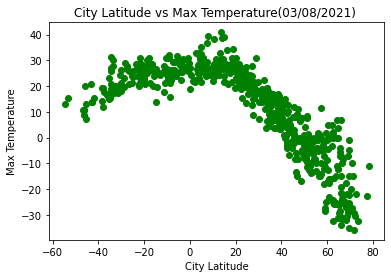

<Figure size 432x288 with 0 Axes>

In [10]:
#Latitude vs. Temperature Plot

#datetime
t = time.strftime("%m/%d/%Y")
#scatterplot
plt.scatter(weather_df["Lat"], weather_df["Max Temperature"],facecolors="green")

#labels
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude vs Max Temperature({t}) ")
#print result
plt.show()
plt.tight_layout()
plt.savefig("Figures/fig1.png")

### Latitude vs. Humidity Plot

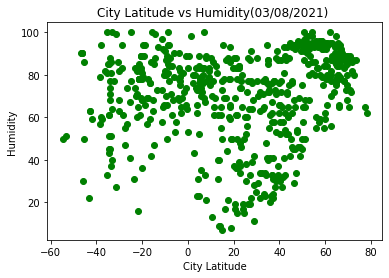

<Figure size 432x288 with 0 Axes>

In [11]:
#Latitude vs. Humidity Plot
#datetime
t = time.strftime("%m/%d/%Y")
#scatterplot
plt.scatter(weather_df["Lat"], weather_df["Humidity"],facecolors="green")

# labels
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs Humidity({t}) ")
#print message
plt.show()
plt.tight_layout()
plt.savefig("Figures/fig2.png")

### Latitude vs. Cloudiness Plot

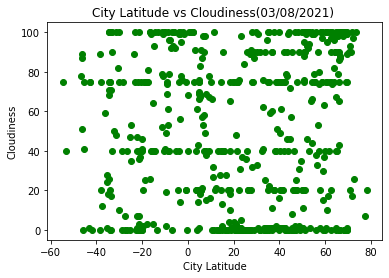

<Figure size 432x288 with 0 Axes>

In [12]:
#Latitude vs. Cloudiness Plot
#datetime
t = time.strftime("%m/%d/%Y")
#scatterplot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"],facecolors="green")

# plt.scatterplot
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness({t}) ")
#print result with tight label
plt.show()
plt.tight_layout()
#print result
plt.savefig("Figures/fig3.png")

### Latitude vs. Wind Speed Plot

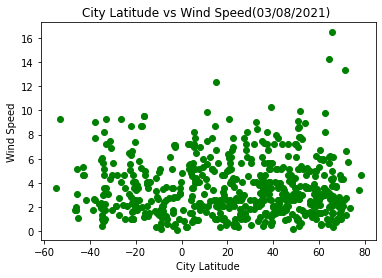

<Figure size 432x288 with 0 Axes>

In [13]:
#Latitude vs. Wind Speed Plot
#datetime
t = time.strftime("%m/%d/%Y")
plt.scatter(weather_df["Lat"], weather_df["Wind speed"],facecolors="green")

# plt.scatterplot
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs Wind Speed({t}) ")
#print result
plt.show()
plt.tight_layout()
plt.savefig("Figures/fig4.png")

## Linear Regression

### Write linear regression plot function (optional)

In [14]:
#linear regression equation is:
#regression_value = x_value * slope + intercept

##line equation:
#line_equation_value = "y = " + str(slope) + "x + " + str(intercept)


#dataframe
#northern hemisphere, greater than 0

n = weather_df.Lat >= 0


northernhem_df = weather_df[n]


In [15]:
#souther hemisphere, less than 0
s = weather_df.Lat < 0

southernhem_df = weather_df[s]



###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

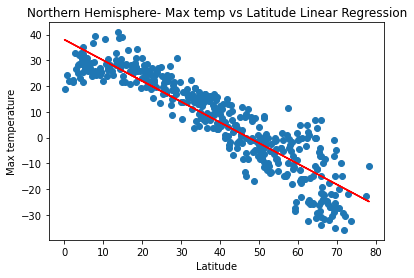

<Figure size 432x288 with 0 Axes>

In [16]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_latitude = northernhem_df["Lat"].astype(float)

y_temperature = northernhem_df["Max Temperature"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_temperature)
#regression value equation
regress_val = x_latitude * slope + intercept

#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#scatterplot
plt.scatter(x_latitude,y_temperature)
plt.plot(x_latitude,regress_val,"r-")

#labels
plt.title('Northern Hemisphere- Max temp vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max temperature')

#show results, r value 

#print(f " The r-squared value here is {rvalue}")
plt.show()
plt.tight_layout()
plt.savefig("Figures/fig5.png")

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

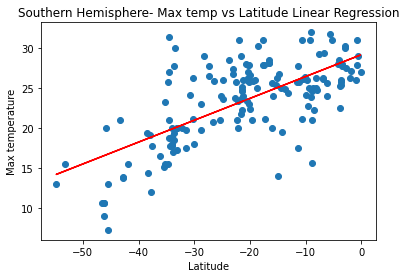

<Figure size 432x288 with 0 Axes>

In [17]:
#S Hemisphere - Max Temp vs. Latitude Linear Regression

x_latitude = southernhem_df['Lat'].astype(float)
y_temperature = southernhem_df['Max Temperature'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_temperature)
#regression value equation
regress_val = x_latitude * slope + intercept

#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#scatterplot
plt.scatter(x_latitude,y_temperature)
plt.plot(x_latitude,regress_val,"r-")

#labels
plt.title('Southern Hemisphere- Max temp vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max temperature')

#show results, r value 
plt.show()
plt.tight_layout()
plt.savefig("Figures/fig6.png")

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

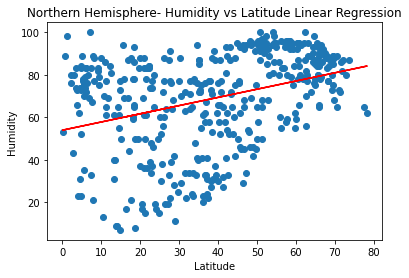

<Figure size 432x288 with 0 Axes>

In [18]:
#Northern Hemisphere - HUmidity vs. Latitude Linear Regression

x_latitude = northernhem_df['Lat'].astype(float)
y_hum = northernhem_df['Humidity'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_hum)
#regression value equation
regress_val = x_latitude * slope + intercept

#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#scatterplot
plt.scatter(x_latitude,y_hum)
plt.plot(x_latitude,regress_val,"r-")

#labels
plt.title('Northern Hemisphere- Humidity vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#show results, r value 

plt.show()
plt.tight_layout()

plt.savefig("Figures/fig7.png")

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

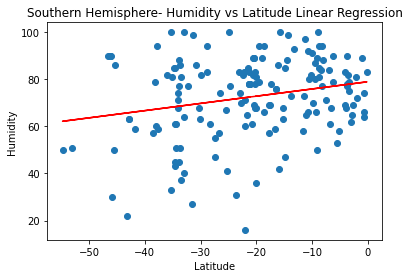

<Figure size 432x288 with 0 Axes>

In [19]:
#Southern Hemisphere - HUmidity vs. Latitude Linear Regression

x_latitude = southernhem_df['Lat'].astype(float)
y_hum = southernhem_df['Humidity'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_hum)
#regression value equation
regress_val = x_latitude * slope + intercept

#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#scatterplot
plt.scatter(x_latitude,y_hum)
plt.plot(x_latitude,regress_val,"r-")

#labels
plt.title('Southern Hemisphere- Humidity vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#show results, r value 
plt.show()
plt.tight_layout()
plt.savefig("Figures/fig8.png")

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

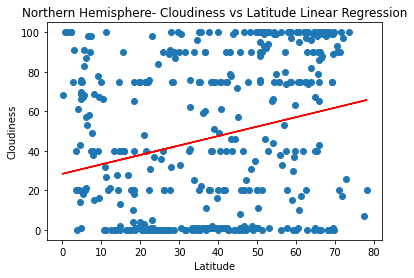

<Figure size 432x288 with 0 Axes>

In [20]:
#Northern Hemisphere - Cloudiness vs. Latitude Linear Regression

x_latitude = northernhem_df['Lat'].astype(float)
y_c = northernhem_df['Cloudiness'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_c)
#regression value equation
regress_val = x_latitude * slope + intercept

#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#scatterplot
plt.scatter(x_latitude,y_c)
plt.plot(x_latitude,regress_val,"r-")

#labels
plt.title('Northern Hemisphere- Cloudiness vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#show results, r value 

plt.show()
plt.tight_layout()
plt.savefig("Figures/fig9.png")

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

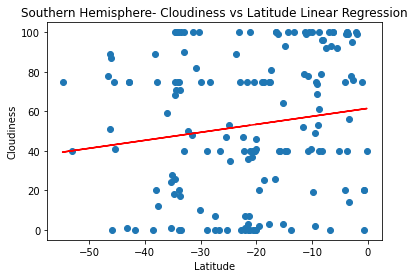

<Figure size 432x288 with 0 Axes>

In [21]:
#S Hemisphere - Cloudiness vs. Latitude Linear Regression

x_latitude = southernhem_df['Lat'].astype(float)
y_c = southernhem_df['Cloudiness'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_c)
#regression value equation
regress_val = x_latitude * slope + intercept

#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#scatterplot
plt.scatter(x_latitude,y_c)
plt.plot(x_latitude,regress_val,"r-")

#labels
plt.title('Southern Hemisphere- Cloudiness vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#show results, r value 

plt.show()
plt.tight_layout()
plt.savefig("Figures/fig10.png")

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

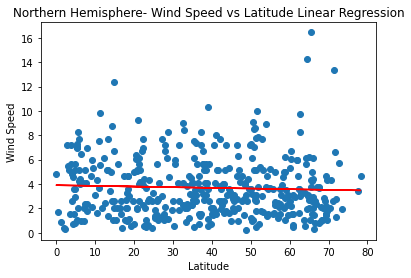

<Figure size 432x288 with 0 Axes>

In [22]:
#northern hem

x_latitude = northernhem_df['Lat'].astype(float)
y_s = northernhem_df['Wind speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_s)
#regression value equation
regress_val = x_latitude * slope + intercept

#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#scatterplot
plt.scatter(x_latitude,y_s)
plt.plot(x_latitude,regress_val,"r-")

#labels
plt.title('Northern Hemisphere- Wind Speed vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#show results, tight layout
plt.show()
plt.tight_layout()
plt.savefig("Figures/fig11.png")

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

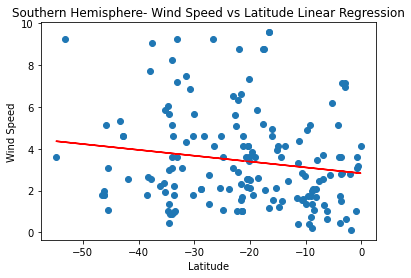

<Figure size 432x288 with 0 Axes>

In [23]:
#southern hem

x_latitude = southernhem_df['Lat'].astype(float)
y_s = southernhem_df['Wind speed'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_s)
#regression value equation
regress_val = x_latitude * slope + intercept

#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#scatterplot
plt.scatter(x_latitude,y_s)
plt.plot(x_latitude,regress_val,"r-")

#labels
plt.title('Southern Hemisphere- Wind Speed vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#show results, tight layout

plt.show()
plt.tight_layout()
plt.savefig("Figures/fig12.png")

In [24]:
#Observations:
# 1) For the northern hemisphere, max temperture and latitude had a negative linear correlation.
# 2) In the southern hemisphere on the otherhand, max temperture and latitude had more of a positive correlation.
# 3) Interestly, both in the northern hemisphere and southern hemisphere, the cloudiness and latitude 
#    had a mostly positive correlation
